In [12]:
%matplotlib inline
#coding:utf8
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

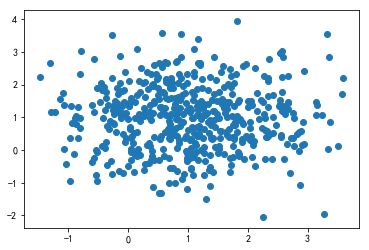

In [94]:
x = np.random.normal(1,1,500)
y = np.random.normal(1,1,500)
n = plt.scatter(x,y)

## 线性同余法

$X_{n+1} = (aX_n + c ) \pmod{m}$

In [170]:
#LCG2
seed = 0
def lcg():
  global seed
  m,a,c = (1<<31),1103515245,12345
  seed = (a * seed + c) % m
  return seed
seed=1
x = [lcg2() for i in range(20)]
print(x)

[1103527590, 377401575, 662824084, 1147902781, 2035015474, 368800899, 1508029952, 486256185, 1062517886, 267834847, 180171308, 836760821, 595337866, 790425851, 2111915288, 1149758321, 1644289366, 1388290519, 1647418052, 1675546029]


## 通过舍弃低16位来解决低位区间周期性太小的问题

In [66]:
#LCG
seed = 11
def lcg32767():
  return lcg()>>16 & 0x7fff
seed=1
x = [lcg1() for i in range(20)]
print(x)

[16838, 5758, 10113, 17515, 31051, 5627, 23010, 7419, 16212, 4086, 2749, 12767, 9084, 12060, 32225, 17543, 25089, 21183, 25137, 25566]


## 0～10000的随机数

由于lcg32767()返回的最大值为32767，不能按照长度10000来等分，会导致0～2767的概率比其余部分要大

解决的方法可以采用拒绝采样法

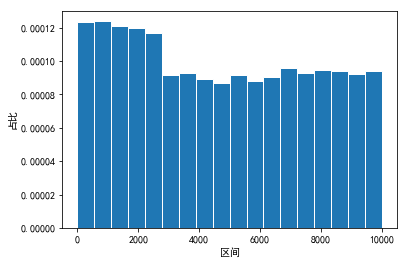

In [76]:
seed = 1;
x = [(lcg32767() % 10000) for i in range(20000)]
fig, ax = plt.subplots()
ax.set_xlabel('区间')lcg32767
ax.set_ylabel('占比')
n,b,p=ax.hist(x,18,density=True,edgecolor='white')

## 基于IEEE浮点数标准的0～1随机数

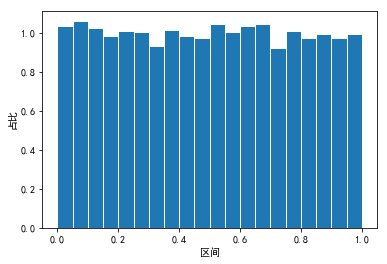

In [60]:
import random
from ctypes import *
def rand01():
    i = 0x7f<<23 | random.randrange(0,0x7fffff)
    f = cast(pointer(c_int(i)),POINTER(c_float)).contents.value - 1
    return f
x = [rand01() for i in range(0,10000)]
fig, ax = plt.subplots()
ax.set_xlabel('区间')
ax.set_ylabel('占比')
n,b,p=ax.hist(x,20,density=True,edgecolor='white')

## 正态分布拒绝采样法

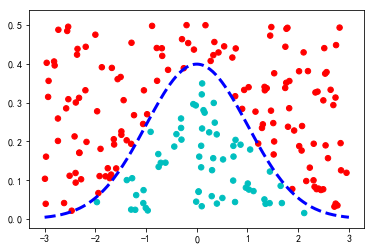

In [169]:
def nd(x):
  return ((1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * x**2))
x = np.random.random(200) * 6 - 3
y = np.random.random(200) * 0.5
colors = list(map(lambda x,y:'c' if y<nd(x) else 'r',x,y))
xl = np.linspace(-3, 3, 200)
fig, ax = plt.subplots()
c = ax.scatter(x,y,c = colors,s=30)
line = ((1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * xl**2))
l = ax.plot(xl, line, '--',c = 'b',lw=3)

## 基于中心极限定理的采样

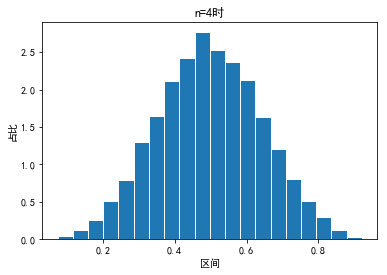

In [199]:
sample = 10000
num = 4
x = np.random.random(sample)
for i in range(num - 1):
    x += np.random.random(sample)
x /= num
fig, ax = plt.subplots()
ax.set_xlabel('区间')
ax.set_ylabel('占比')
ax.set_title('n=4时')
n,b,p=ax.hist(x,20,density=True,edgecolor='white')

## 在单位圆内随机采样

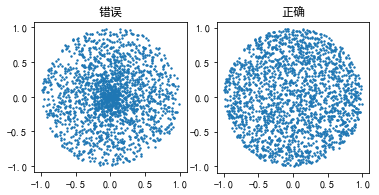

In [225]:
sample = 2000
r = np.random.random(sample)
a = np.random.random(sample) * 2 * np.pi
x1 = r * np.sin(a)
y1 = r * np.cos(a)
x2 = np.sqrt(r) * np.sin(a)
y2 = np.sqrt(r) * np.cos(a)
fig, ax = plt.subplots(1,2,subplot_kw={'aspect': 'equal'})
ax[0].set_title("错误")
ax[1].set_title("正确")
c = ax[0].scatter(x1,y1,s=2)
c = ax[1].scatter(x2,y2,s=2)